In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import os
import glob

folder_path = 'data'  # Replace with your folder path

# Get all Excel files in the folder
excel_files = glob.glob(f"{folder_path}/*.xls*")

# Dictionary comprehension to read all files
dfs = {
    os.path.basename(file): pd.read_excel(file) 
    for file in excel_files
}

for key in dfs:
    dfs[key] = dfs[key].dropna(how='all')

excel_list = list(dfs.keys())


In [ ]:
import pandas as pd
import re

def parse_japanese_date(date_str):
    if date_str is np.nan:
        return pd.NaT
    
    date_str = date_str.replace('元', '1')
    
    # Regex to match era and year (e.g., 平成6, 令和3, 昭和50)
    match = re.match(r'(令和|平成|昭和|大正|明治)(\d+)暦年末', date_str)
    if not match:
        return pd.NaT  # Return NaT for invalid formats
    
    era, year = match.groups()
    year = int(year)
    
    # Map era to start year
    era_start_years = {
        '令和': 2019,  # Reiwa starts May 1, 2019
        '平成': 1989,  # Heisei starts January 8, 1989
        '昭和': 1926,  # Showa starts December 25, 1926
        '大正': 1912,  # Taisho starts July 30, 1912
        '明治': 1868   # Meiji starts September 8, 1868
    }
    
    if era not in era_start_years:
        return pd.NaT  # Return NaT for unsupported eras
    
    # Convert era year to Gregorian year
    gregorian_year = era_start_years[era] + year - 1
    
    # Since it's "暦年末", assume December 31st
    try:
        return pd.to_datetime(f"{gregorian_year}-12-31")
    except ValueError:
        return pd.NaT  # Return NaT for invalid dates (e.g., future years)

In [59]:
df = dfs[excel_list[0]]
df_shape_tuple_list = []
i = 0
for df in dfs.values():
    # print(df.iloc[3, 1], df.iloc[3, -1])
    # if df.iloc[3, 1] is np.nan:
    df = df.dropna(how='all')
    print(df.iloc[3, 1], df.iloc[3, -1])
    if df.iloc[3, 1] is np.nan:
        i += 1
        continue
    df_shpae_tuple = (i, df.columns[0], int(df.iloc[3, 1]), int(df.iloc[3, -1]))
    df_shape_tuple_list.append(df_shpae_tuple)
    # print(df.columns[0], df.shape)
    # print(df.shape)
    i += 1
# df_shape_tuple_list.sort(key=lambda x:x[2], reverse=True)
df_shape_tuple_list.sort(key=lambda x:x[3], reverse=True)
df_shape_tuple_list

1994 2022
1994 2011
1994 2013
1994 2012
2001 2011
1994 2023
1994 2015
2001 2010
1994 2016
1994 2018
1996 2006
nan Net international investment position
1994 2020
1969 1998
1980 2007
1980 2008
1996 2007
1994 2017
1980 2009
1980 2003
1994 2014
1994 2019
1994 2021


[(5, '５．対外資産・負債残高', 1994, 2023),
 (0, '５．対外資産・負債残高', 1994, 2022),
 (22, '５．対外資産・負債残高', 1994, 2021),
 (12, '５．対外資産・負債残高', 1994, 2020),
 (21, '５．対外資産・負債残高', 1994, 2019),
 (9, '５．対外資産・負債残高', 1994, 2018),
 (17, '５．対外資産・負債残高', 1994, 2017),
 (8, '５．対外資産・負債残高', 1994, 2016),
 (6, '５．対外資産・負債残高', 1994, 2015),
 (20, '６．対外資産・負債残高', 1994, 2014),
 (2, '６．対外資産・負債残高', 1994, 2013),
 (3, '６．対外資産・負債残高', 1994, 2012),
 (1, '６．対外資産・負債残高', 1994, 2011),
 (4, '６．対外資産・負債残高', 2001, 2011),
 (7, '６．対外資産・負債残高', 2001, 2010),
 (18, '５．対外資産・負債残高', 1980, 2009),
 (15, '５．対外資産・負債残高', 1980, 2008),
 (14, '５．対外資産・負債残高', 1980, 2007),
 (16, '５．対外資産・負債残高', 1996, 2007),
 (10, '５．対外資産・負債残高', 1996, 2006),
 (19, '５．対外資産・負債残高', 1980, 2003),
 (13, '４．対外資産・負債残高', 1969, 1998)]

In [60]:
original_df = dfs[excel_list[5]].copy()
original_df = original_df.dropna(how='all')
original_df.columns = pd.to_datetime(original_df.iloc[3], format='%Y') + pd.offsets.YearEnd()
original_df = original_df.set_index('NaT')
original_df = original_df.dropna(how='all')
original_df = original_df.drop(original_df.index[:1])
original_df = original_df.replace('-', np.nan)
original_df = original_df.T
original_df.columns = [column.replace('　', '') for column in original_df.columns]

print(original_df.columns)
original_df.tail()

Index(['１．外貨準備高', '（１）貨幣用金', '（２）ＳＤＲ', '（３）ＩＭＦリザーブポジション', '（４）その他の外貨準備',
       '２．現金・預金', '３．貸出', '４．金融派生商品', '５．預け金', '６．貿易信用', '７．未収金', '８．直接投資',
       '９．対外証券投資', '１０．その他対外債権', '対外資産', '１１．ＳＤＲ', '１２．現金・預金', '１３．借入',
       '１４．債務証券', 'うち国債等', '１５．持分・投資信託受益証券', '１６．金融派生商品', '１７．預り金', '１８．貿易信用',
       '１９．未払金', '２０．その他対外債務', '対外負債', '対外純資産'],
      dtype='object')


,１．外貨準備高,（１）貨幣用金,（２）ＳＤＲ,（３）ＩＭＦリザーブポジション,（４）その他の外貨準備,２．現金・預金,３．貸出,４．金融派生商品,５．預け金,６．貿易信用,...,１４．債務証券,うち国債等,１５．持分・投資信託受益証券,１６．金融派生商品,１７．預り金,１８．貿易信用,１９．未払金,２０．その他対外債務,対外負債,対外純資産
4,,,,,,,,,,,,,,,,,,,,,
2019-12-31,144487.3,4089.7,2093.4,1222.7,137081.5,8296.8,160005.1,26333.8,6200,8532,...,186319.3,142128,242400.8,29919.2,2691.1,2816,8696,53682,729675.4,359438.5
2020-12-31,144112.3,4807.5,2088.1,1565.1,135651.6,8618.1,160847.5,30974.5,7069.6,8376,...,206362.3,158081.5,256489.9,36419.2,3720.8,2482,13616.6,46395.9,787320.7,362114.2
2021-12-31,161829.9,5699,7177.8,1225.2,147727.9,8621.4,171369.1,22219.7,7605.3,10318,...,227260.3,171229.7,279546.8,27330.9,3226.7,3301,17680.9,48700.6,838045.9,421477.6
2022-12-31,162211.9,6513.8,7833.6,1429.4,146435.1,10946.9,204484,54308.1,8926.1,11255.3,...,231747.5,174080.3,264109.7,63423.3,6385.6,4038.6,16988.1,60053.6,901405,423456.8
2023-12-31,183061.7,7931.8,8134.1,1498.4,165497.4,10475.6,224053.8,41910,9483.3,12591.6,...,224816.4,161883.2,322802,49072.5,5299.5,4364.2,16817.9,68950.6,1000042.4,475434.7


<Axes: xlabel='4'>

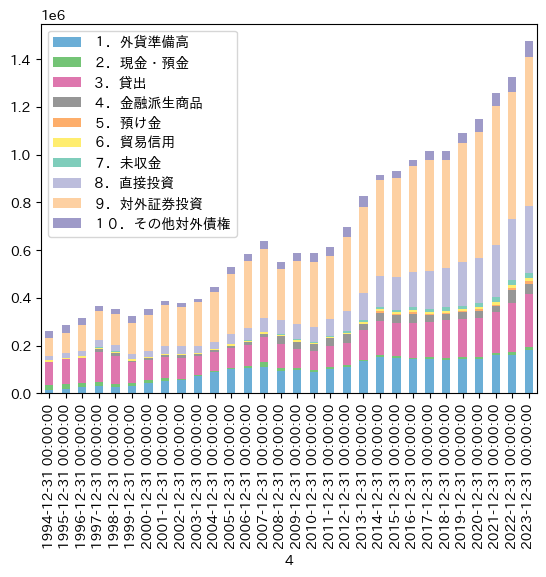

In [61]:
asset_df = original_df.iloc[:, :14].copy()
asset_df = asset_df.drop(asset_df.columns[1:5], axis=1)
asset_df = asset_df.fillna(0)
asset_ratio_df = asset_df.div(asset_df.sum(axis=1), axis=0)

colors = [
    '#6baed6', '#74c476', '#de77ae', '#969696', '#fdae6b',
    '#ffed6f', '#7fcdbb', '#bcbddc', '#fdd0a2', '#9e9ac8'
]

asset_df.plot.bar(stacked=True, color=colors)
# asset_ratio_df.plot.bar(stacked=True, legend=False, color=colors)

<Axes: xlabel='4'>

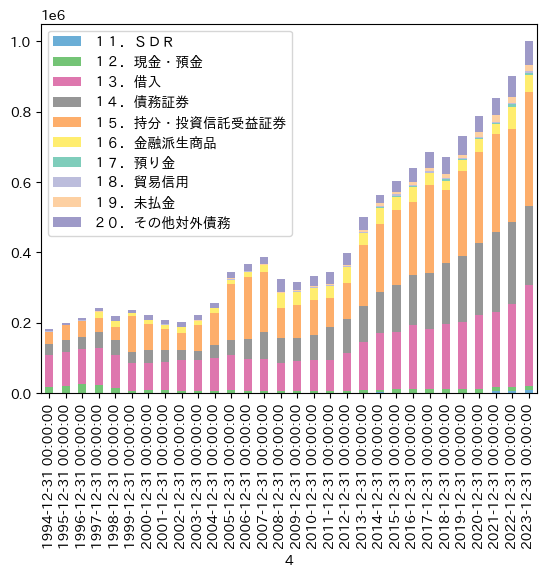

In [62]:
debt_df = original_df.iloc[:, 15:26].copy()
debt_df = debt_df.drop(debt_df.columns[4], axis=1)
debt_df = debt_df.fillna(0)
debt_ratio_df = debt_df.div(debt_df.sum(axis=1), axis=0)

debt_df.plot.bar(stacked=True, color=colors)
# debt_ratio_df.plot.bar(stacked=True, legend=False, color=colors)

<Axes: xlabel='4'>

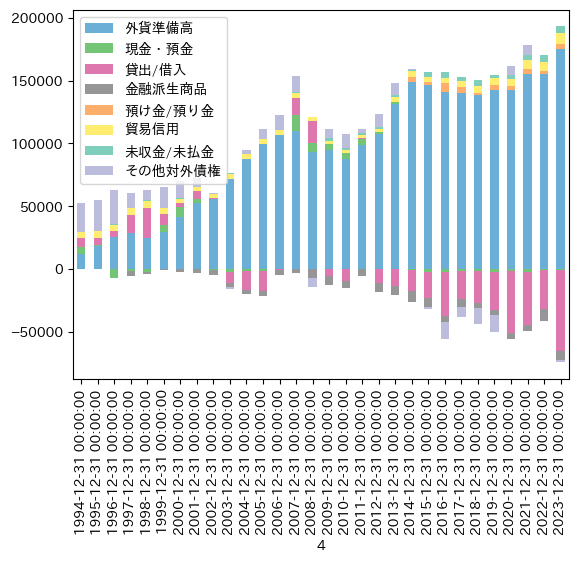

In [63]:
# print(asset_df.columns)
# print(debt_df.columns)
equity_df = pd.DataFrame(asset_df.drop(columns=asset_df.columns[7:9]).to_numpy() - debt_df.drop(columns=debt_df.columns[3:5], axis=1).to_numpy(), index=asset_df.index)
# print(asset_df.columns)
# print(debt_df.columns)

columns = ['外貨準備高', '現金・預金', '貸出/借入', '金融派生商品', '預け金/預り金', '貿易信用', '未収金/未払金', 'その他対外債権']
equity_df.columns = columns
# print(equity_df.index)
# print(df.index)

equity_df.plot.bar(stacked=True, color=colors)
# equity_df

In [64]:
# security_series = pd.Series(asset_df.iloc[:, 8].to_numpy() - debt_df.iloc[:, 3].to_numpy() - debt_df.iloc[:, 4].to_numpy(), name='証券', index=df.index)
# # print( pd.Series(df.iloc[:, 8].to_numpy() - debt_df.iloc[:, 3].to_numpy() - debt_df.iloc[:, 4].to_numpy(), name='証券'))
# bs_df = equity_df.join(security_series)
# bs_df = bs_df.join(asset_df.iloc[:, 7])
# # bs_df = equity_df.join(asset_df.iloc[:, 7:9])
# # bs_df = bs_df.join(pd.DataFrame(-debt_df.iloc[:, 3:5].to_numpy(), columns=debt_df.columns[3:5], index=debt_df.index))

# colors = [
#     "#FFB6C1",  # Light Pink
#     "#FFD700",  # Gold
#     "#98FB98",  # Pale Green
#     "#87CEEB",  # Sky Blue
#     "#DDA0DD",  # Plum
#     "#FFA07A",  # Light Salmon
#     "#F0E68C",  # Khaki
#     "#9ACD32",  # Yellow Green
#     "#40E0D0",  # Turquoise
#     "#FF8C00",  # Dark Orange (mildly bright)
#     "#BA55D3",  # Medium Orchid
#     "#7FFFD4"   # Aquamarine
# ]
# # columns = ['外貨準備高', '現金・預金', '貸出/借入', '金融派生商品', '預け金/預り金', '貿易信用', '未収金/未払金', 'その他対外債権', '直接投資', '対外証券投資', '債務証券', '持分・投資信託受益証券']
# # bs_df.columns = columns

# ax = df['対外純資産'].plot()
# bs_df.plot.bar(stacked=True, color=colors)
# bs_df

In [70]:
print(asset_df)
print(debt_df)
print(equity_df)

             １．外貨準備高  ２．現金・預金      ３．貸出  ４．金融派生商品    ５．預け金   ６．貿易信用    ７．未収金  \
4                                                                              
1994-12-31   12263.6  24095.2   95956.6       0.0      0.0   5743.1    703.1   
1995-12-31   18814.0  21626.4  102231.4       0.0      0.0   6100.6    724.9   
1996-12-31   25268.2  17731.3  105561.3       0.0      0.0   6310.8    912.5   
1997-12-31   28685.3  20365.2  122157.5   13175.6      0.0   6690.4    834.4   
1998-12-31   24877.3  11686.3  118856.0   12752.5      0.0   6371.0    838.6   
1999-12-31   29407.2  12438.0   87242.8    7662.1      0.0   5589.0    551.3   
2000-12-31   41552.2  15650.7   80462.3    7955.5      0.0   4757.0    449.8   
2001-12-31   52845.5  10937.4   87299.2   10107.6      0.0   4317.0    488.0   
2002-12-31   56071.4   5439.6   87668.8   11948.6      0.0   4333.0    440.7   
2003-12-31   72047.4   4709.6   77481.6    8961.5      0.0   5129.0    354.2   
2004-12-31   87646.7   5134.8   78558.8 

In [100]:
asset_diff_df = asset_df.diff().dropna(how='all')
debt_diff_df = debt_df.diff().dropna(how='all')
equity_diff_df = equity_df.diff().dropna(how='all') 

asset_log_diff_df = asset_df.apply(np.log).diff().dropna(how='all')
debt_log_diff_df = debt_df.apply(np.log).diff().dropna(how='all')
equity_log_diff_df = equity_df.apply(np.log).diff().dropna(how='all') 

In [125]:
from statsmodels.tsa.stattools import adfuller

class adf_test:
    def __init__(self, time_series_df):
        self.time_series_df = time_series_df
        self.adf_df = self.adf_df()
        self.adf_tf_df = self.adf_tf_df()
    
    def adf_df(self):
        adf_dict = {}

        for column in self.time_series_df.columns:
            adf_list = []

            for i in range(3, len(self.time_series_df)):
                try:
                    adf_result = adfuller(self.time_series_df[column].tail(i+1))
                except:
                    continue
                adf_list.append(adf_result[1])

            adf_dict[f'{column}'] = adf_list
        adf_df = pd.DataFrame.from_dict(adf_dict, orient='index').T
        return adf_df
    
    def adf_score(self):
        adf_scores_numpy = (self.adf_df.index.to_numpy() @ self.adf_df.to_numpy())/self.adf_df.index.to_numpy().sum()
        adf_scores_dict = {self.adf_df.columns[i] : adf_scores_numpy[i] for i in range(len(adf_scores_numpy))}
        adf_scores_series = pd.Series(adf_scores_dict)
        return adf_scores_series

    def adf_tf_score(self, siginificance_level=0.05):
        adf_tf_scores_numpy = (self.adf_df.index.to_numpy() @ self.adf_df.to_numpy())/self.adf_df.index.to_numpy().sum()
        adf_tf_scores_dict = {self.adf_df.columns[i] : adf_tf_scores_numpy[i] for i in range(len(adf_tf_scores_numpy))}
        adf_tf_scores_series = pd.Series(adf_tf_scores_dict)
        return adf_tf_scores_series
    
    def adf_tf_df(self, siginificance_level=0.05):
        return self.adf_df < siginificance_level

# non_stationary_list = ['４．金融派生商品', '６．貿易信用', '７．未収金', ]

# equity_non_stationary = ['預け金/預り金', '未収金/未払金']

adf_test(asset_diff_df).adf_score()

１．外貨準備高       0.098146
２．現金・預金       0.135972
３．貸出          0.087473
４．金融派生商品      0.206608
５．預け金         0.022988
６．貿易信用        0.274973
７．未収金         0.491519
８．直接投資        0.309999
９．対外証券投資      0.111959
１０．その他対外債権    0.094621
dtype: float64

In [ ]:
print(adf_test(asset_diff_df).adf_score().sort_values())
print(adf_test(debt_diff_df).adf_score().sort_values())
print(adf_test(equity_diff_df).adf_score().sort_values())

５．預け金         0.022988
３．貸出          0.087473
１０．その他対外債権    0.094621
１．外貨準備高       0.098146
９．対外証券投資      0.111959
２．現金・預金       0.135972
４．金融派生商品      0.206608
６．貿易信用        0.274973
８．直接投資        0.309999
７．未収金         0.491519
dtype: float64
１１．ＳＤＲ            0.011483
２０．その他対外債務        0.053205
１２．現金・預金          0.073332
１８．貿易信用           0.095830
１７．預り金            0.118198
１５．持分・投資信託受益証券    0.184101
１６．金融派生商品         0.235441
１４．債務証券           0.426564
１３．借入             0.466101
１９．未払金            0.630223
dtype: float64
金融派生商品     0.019650
外貨準備高      0.109437
貸出/借入      0.142096
その他対外債権    0.161036
現金・預金      0.194394
貿易信用       0.222766
未収金/未払金    0.231043
預け金/預り金    0.554090
dtype: float64


In [131]:
print(adf_test(asset_diff_df).adf_tf_score().sort_values(ascending=False))
print(adf_test(debt_diff_df).adf_tf_score().sort_values(ascending=False))
print(adf_test(equity_diff_df).adf_tf_score().sort_values(ascending=False))

７．未収金         0.491519
８．直接投資        0.309999
６．貿易信用        0.274973
４．金融派生商品      0.206608
２．現金・預金       0.135972
９．対外証券投資      0.111959
１．外貨準備高       0.098146
１０．その他対外債権    0.094621
３．貸出          0.087473
５．預け金         0.022988
dtype: float64
１９．未払金            0.630223
１３．借入             0.466101
１４．債務証券           0.426564
１６．金融派生商品         0.235441
１５．持分・投資信託受益証券    0.184101
１７．預り金            0.118198
１８．貿易信用           0.095830
１２．現金・預金          0.073332
２０．その他対外債務        0.053205
１１．ＳＤＲ            0.011483
dtype: float64
預け金/預り金    0.554090
未収金/未払金    0.231043
貿易信用       0.222766
現金・預金      0.194394
その他対外債権    0.161036
貸出/借入      0.142096
外貨準備高      0.109437
金融派生商品     0.019650
dtype: float64


In [133]:
# print(adf_test(asset_diff_df).adf_tf_df)
# print(adf_test(debt_diff_df).adf_tf_df)
# print(adf_test(equity_diff_df).adf_tf_df)

In [134]:
print(adf_test(asset_log_diff_df).adf_score().sort_values())
print(adf_test(debt_log_diff_df).adf_score().sort_values())
print(adf_test(equity_log_diff_df).adf_score().sort_values())

７．未収金         0.054845
１０．その他対外債権    0.064748
３．貸出          0.074347
９．対外証券投資      0.077137
２．現金・預金       0.126487
８．直接投資        0.196808
６．貿易信用        0.197431
１．外貨準備高       0.276567
４．金融派生商品           NaN
５．預け金              NaN
dtype: float64
２０．その他対外債務        0.034864
１１．ＳＤＲ            0.037430
１５．持分・投資信託受益証券    0.101496
１３．借入             0.112880
１９．未払金            0.143811
１８．貿易信用           0.150342
１２．現金・預金          0.250570
１４．債務証券           0.733053
１６．金融派生商品              NaN
１７．預り金                 NaN
dtype: float64
貿易信用       0.180366
外貨準備高      0.274656
現金・預金           NaN
貸出/借入           NaN
金融派生商品          NaN
預け金/預り金         NaN
未収金/未払金         NaN
その他対外債権         NaN
dtype: float64


In [135]:
print(adf_test(asset_log_diff_df).adf_tf_score().sort_values(ascending=False))
print(adf_test(debt_log_diff_df).adf_tf_score().sort_values(ascending=False))
print(adf_test(equity_log_diff_df).adf_tf_score().sort_values(ascending=False))

１．外貨準備高       0.276567
６．貿易信用        0.197431
８．直接投資        0.196808
２．現金・預金       0.126487
９．対外証券投資      0.077137
３．貸出          0.074347
１０．その他対外債権    0.064748
７．未収金         0.054845
４．金融派生商品           NaN
５．預け金              NaN
dtype: float64
１４．債務証券           0.733053
１２．現金・預金          0.250570
１８．貿易信用           0.150342
１９．未払金            0.143811
１３．借入             0.112880
１５．持分・投資信託受益証券    0.101496
１１．ＳＤＲ            0.037430
２０．その他対外債務        0.034864
１６．金融派生商品              NaN
１７．預り金                 NaN
dtype: float64
外貨準備高      0.274656
貿易信用       0.180366
現金・預金           NaN
貸出/借入           NaN
金融派生商品          NaN
預け金/預り金         NaN
未収金/未払金         NaN
その他対外債権         NaN
dtype: float64


In [ ]:
# print(adf_test(asset_log_diff_df).adf_tf_df)
# print(adf_test(debt_log_diff_df).adf_tf_df)
# print(adf_test(equity_log_diff_df).adf_tf_df)

In [136]:
import pandas as pd
from statsmodels.tsa.api import VAR

model = VAR(asset_df.diff().dropna().apply(pd.to_numeric, errors='coerce'))
results = model.fit(maxlags=10)  

print(results.is_stable())
print(results.summary())

/home/sclyde/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


False


LinAlgError: Singular matrix

In [137]:
import pandas as pd
from statsmodels.tsa.api import VAR

model = VAR(debt_df.diff().dropna().apply(pd.to_numeric, errors='coerce'))
results = model.fit(maxlags=10)  

print(results.is_stable())
print(results.summary())

/home/sclyde/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/home/sclyde/.local/lib/python3.8/site-packages/statsmodels/tsa/vector_ar/var_model.py:1559: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


False
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 02, Jun, 2025
Time:                     14:32:40
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -363.230
Nobs:                     19.0000    HQIC:                  -404.938
Log likelihood:           4668.03    FPE:               8.49427e-225
AIC:                     -413.434    Det(Omega_mle):    8.41103e-233
--------------------------------------------------------------------
Results for equation １１．ＳＤＲ
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                     -0.000000         0.000030           -0.008           0.994
L1.１１．ＳＤＲ                 -0.000012         0.000000        -1311.712           0.000
L1.１２．現金・預金               -0.0014

In [138]:
import pandas as pd
from statsmodels.tsa.api import VAR

model = VAR(equity_df.diff().dropna().apply(pd.to_numeric, errors='coerce'))
results = model.fit(maxlags=10)  

print(results.is_stable())
print(results.summary())


False
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 02, Jun, 2025
Time:                     14:32:55
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -319.572
Nobs:                     19.0000    HQIC:                  -346.331
Log likelihood:           3774.25    FPE:               1.82161e-181
AIC:                     -351.782    Det(Omega_mle):    3.09375e-187
--------------------------------------------------------------------
Results for equation 外貨準備高
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.000009         0.000094            0.091           0.928
L1.外貨準備高           -0.174032              NAN              NAN             NAN
L1.現金・預金           -0.277667              NAN              NAN

/home/sclyde/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/home/sclyde/.local/lib/python3.8/site-packages/statsmodels/tsa/vector_ar/var_model.py:1559: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


In [140]:
import pandas as pd
from statsmodels.tsa.api import VAR

print(asset_df.apply(np.log).diff().dropna(how='all').dropna(how='any', axis=1).apply(pd.to_numeric, errors='coerce'))

model = VAR(asset_df.apply(np.log).diff().dropna(how='all').dropna(how='any', axis=1).apply(pd.to_numeric, errors='coerce'))
results = model.fit(maxlags=10)  

print(results.is_stable())
print(results.summary())

             １．外貨準備高   ２．現金・預金      ３．貸出    ６．貿易信用     ７．未収金    ８．直接投資  \
4                                                                        
1995-12-31  0.427966 -0.108098  0.063343  0.060388  0.030535  0.086905   
1996-12-31  0.294945 -0.198583  0.032053  0.033875  0.230154  0.196717   
1997-12-31  0.126838  0.138496  0.146019  0.058411 -0.089475  0.330332   
1998-12-31 -0.142429 -0.555410 -0.027399 -0.048917  0.005021 -0.139224   
1999-12-31  0.167284  0.062339 -0.309218 -0.130956 -0.419455 -0.215615   
2000-12-31  0.345711  0.229759 -0.080906 -0.161183 -0.203476  0.219005   
2001-12-31  0.240422 -0.358328  0.081553 -0.097057  0.081512  0.177239   
2002-12-31  0.059253 -0.698483  0.004225  0.003699 -0.101951 -0.081255   
2003-12-31  0.250698 -0.144103 -0.123526  0.168651 -0.218503 -0.058425   
2004-12-31  0.195990  0.086438  0.013807  0.027309 -0.142363  0.054019   
2005-12-31  0.126778  0.203047  0.071862  0.147707  1.575873  0.367459   
2006-12-31  0.067785  0.223474  0.0607

/home/sclyde/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/home/sclyde/.local/lib/python3.8/site-packages/statsmodels/tsa/vector_ar/var_model.py:1559: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


In [88]:
import pandas as pd
from statsmodels.tsa.api import VAR

print(debt_df.apply(np.log).diff().dropna(how='all').dropna(how='any', axis=1).apply(pd.to_numeric, errors='coerce'))

model = VAR(debt_df.apply(np.log).diff().dropna(how='all').dropna(how='any', axis=1).apply(pd.to_numeric, errors='coerce'))
results = model.fit(maxlags=10)  

print(results.is_stable())
print(results.summary())

              １１．ＳＤＲ  １２．現金・預金     １３．借入   １４．債務証券  １５．持分・投資信託受益証券   １８．貿易信用  \
4                                                                              
1995-12-31  0.048827  0.138522  0.081134  0.004120        0.210104  0.104097   
1996-12-31  0.086339  0.164513  0.041753  0.077516        0.058703  0.089734   
1997-12-31  0.049846 -0.130045  0.070380  0.212661       -0.131281  0.068135   
1998-12-31 -0.077806 -0.467137 -0.128468 -0.007286       -0.061019 -0.170114   
1999-12-31 -0.145658 -0.729370 -0.189377 -0.284089        0.980719 -0.186812   
2000-12-31  0.065788  0.161918 -0.011072  0.103738       -0.289220  0.049846   
2001-12-31  0.099049  0.050608  0.041344 -0.047054       -0.262753  0.052714   
2002-12-31 -0.018487 -0.278245  0.074033 -0.165970       -0.174665  0.149290   
2003-12-31 -0.020950  0.091905 -0.006409 -0.060331        0.399238 -0.183822   
2004-12-31  0.014016 -0.005480  0.078279  0.274104        0.239362  0.214821   
2005-12-31  0.040905  0.116515  0.072328

/home/sclyde/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/home/sclyde/.local/lib/python3.8/site-packages/statsmodels/tsa/vector_ar/var_model.py:1559: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 02, Jun, 2025
Time:                     11:59:51
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -470.473
Nobs:                     19.0000    HQIC:                  -497.232
Log likelihood:           5207.81    FPE:               5.30583e-247
AIC:                     -502.683    Det(Omega_mle):    9.01119e-253
--------------------------------------------------------------------
Results for equation １１．ＳＤＲ
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.230650              NAN              NAN             NAN
L1.１１．ＳＤＲ                 -0.110362              NAN              NAN             NAN
L1.１２．現金・預金               -0.139546    

In [89]:
import pandas as pd
from statsmodels.tsa.api import VAR

print(equity_df.apply(np.log).diff().dropna(how='all').dropna(how='any', axis=1).apply(pd.to_numeric, errors='coerce'))

model = VAR(equity_df.apply(np.log).diff().dropna(how='all').dropna(how='any', axis=1).apply(pd.to_numeric, errors='coerce'))
results = model.fit(maxlags=10)  

print(results.is_stable())
print(results.summary())

               外貨準備高      貿易信用
4                             
1995-12-31  0.431338  0.049258
1996-12-31  0.296319  0.018727
1997-12-31  0.127277  0.055662
1998-12-31 -0.142795 -0.016961
1999-12-31  0.168854 -0.117783
2000-12-31  0.346753 -0.216193
2001-12-31  0.240847 -0.146273
2002-12-31  0.059463 -0.054822
2003-12-31  0.251314  0.292754
2004-12-31  0.196318 -0.031339
2005-12-31  0.126913  0.080615
2006-12-31  0.067792 -0.099797
2007-12-31  0.033626 -0.012112
2008-12-31 -0.168235 -0.332559
2009-12-31  0.021124 -0.033812
2010-12-31 -0.077742  0.020424
2011-12-31  0.120528 -0.240516
2012-12-31  0.084921  0.080482
2013-12-31  0.198336  0.581223
2014-12-31  0.124211  0.011967
2015-12-31 -0.016442 -0.068837
2016-12-31 -0.040944  0.145456
2017-12-31 -0.000905  0.192316
2018-12-31 -0.014500  0.085480
2019-12-31  0.029916 -0.026756
2020-12-31 -0.002446  0.030666
2021-12-31  0.086171  0.174401
2022-12-31 -0.001505  0.028062
2023-12-31  0.123006  0.131072
False
  Summary of Regression Results  

/home/sclyde/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/home/sclyde/.local/lib/python3.8/site-packages/statsmodels/tsa/vector_ar/var_model.py:1559: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


<Figure size 640x480 with 0 Axes>

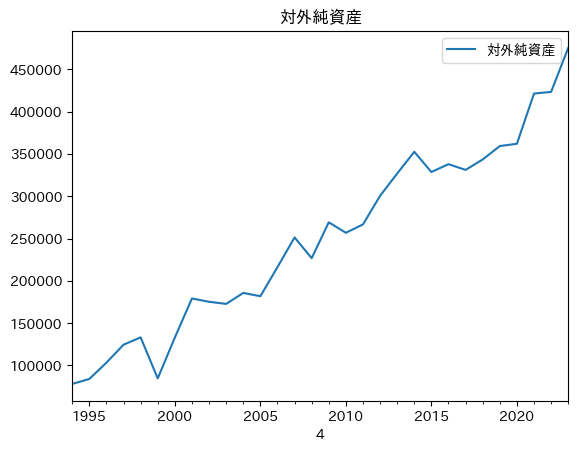

<Figure size 640x480 with 0 Axes>

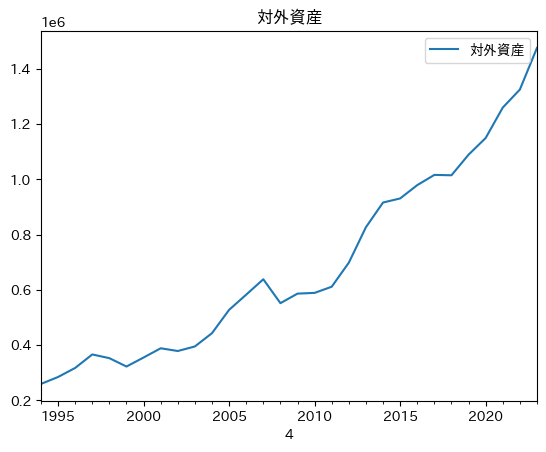

<Figure size 640x480 with 0 Axes>

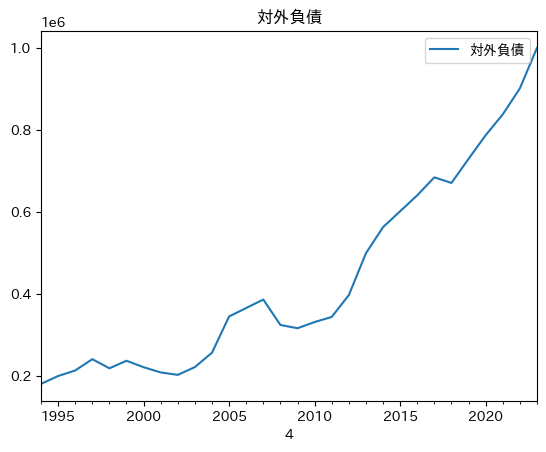

In [ ]:
plt.figure()  # Create a new figure for each column
df.filter(like='対外純資産').plot(title='対外純資産')
plt.show()

plt.figure()  # Create a new figure for each column
df.filter(like='対外資産').plot(title='対外資産')
plt.show()

plt.figure()  # Create a new figure for each column
df.filter(like='対外負債').plot(title='対外負債')
plt.show()

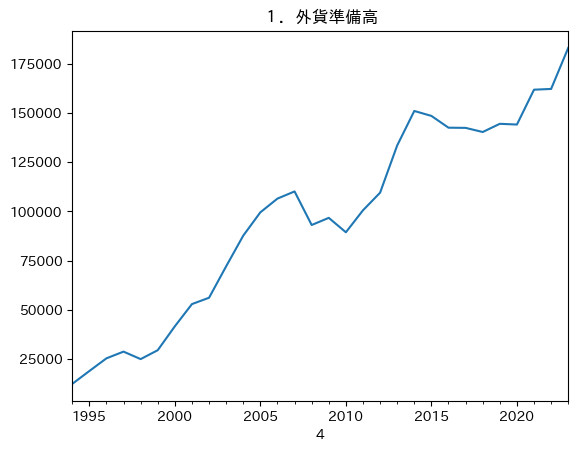

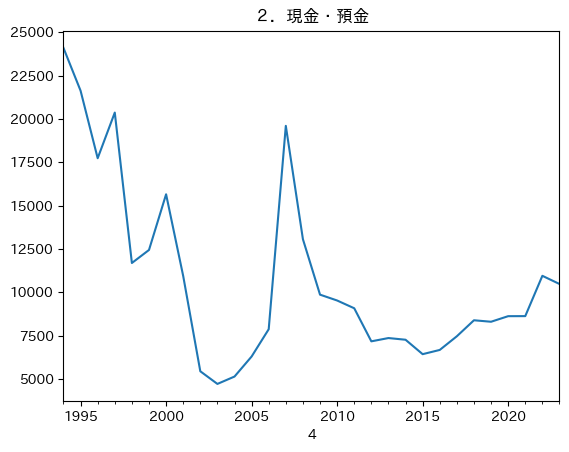

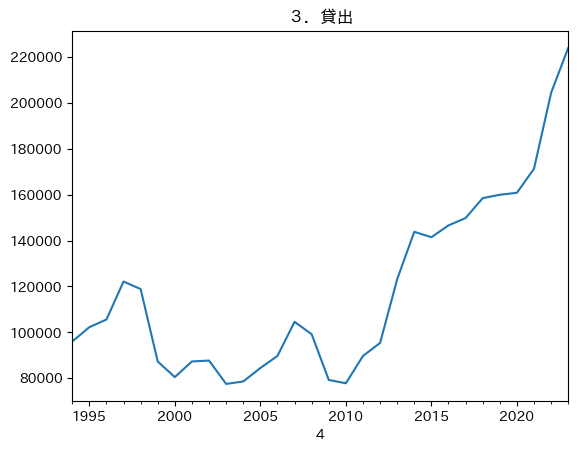

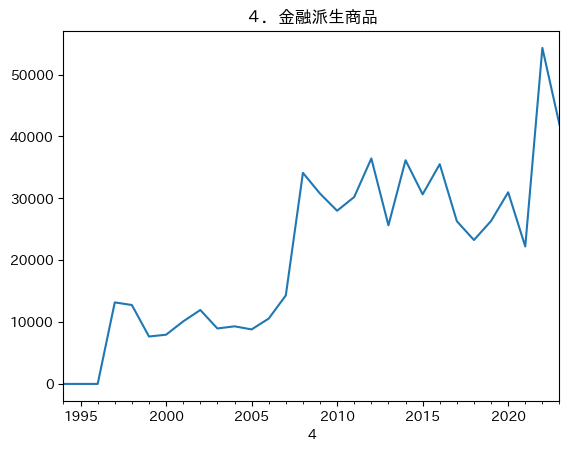

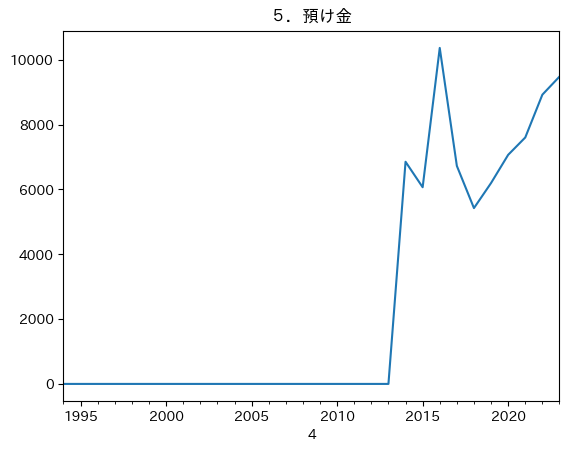

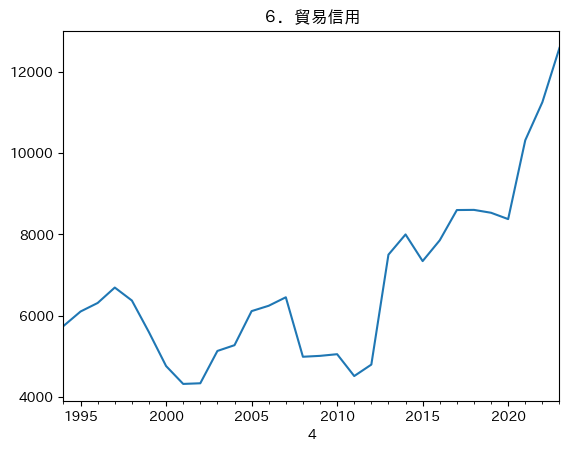

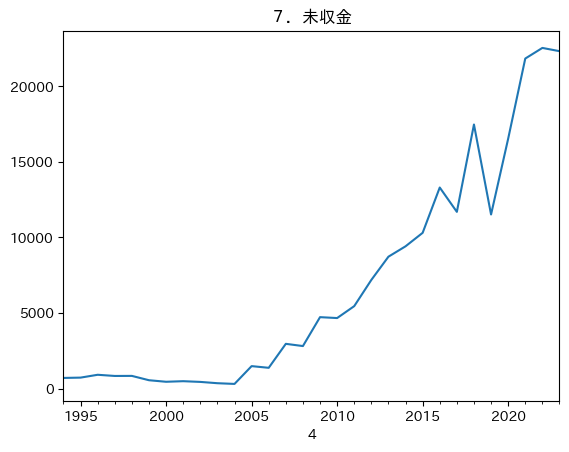

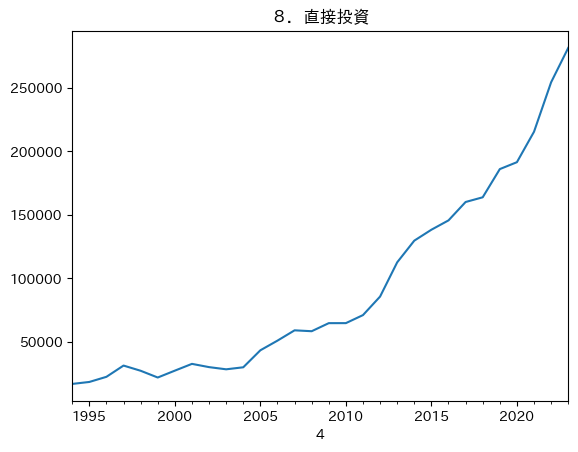

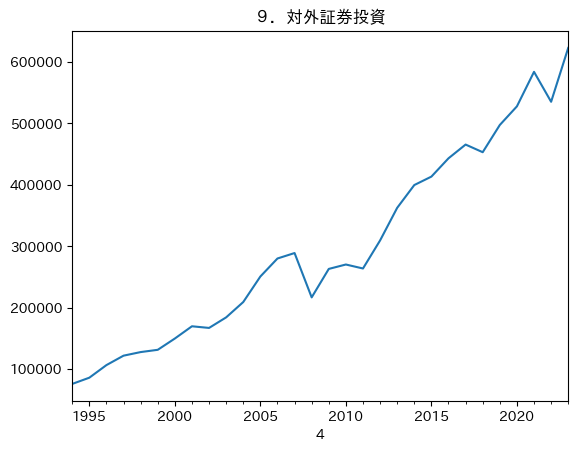

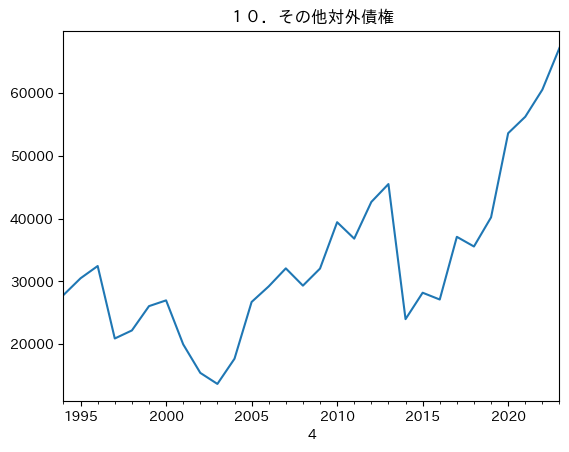

In [91]:
for column in asset_df.columns:
    plt.figure()  # Create a new figure for each column
    asset_df[column].plot(title=column)
    plt.show()

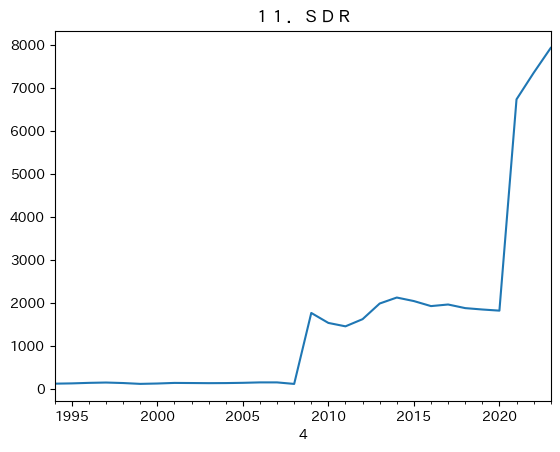

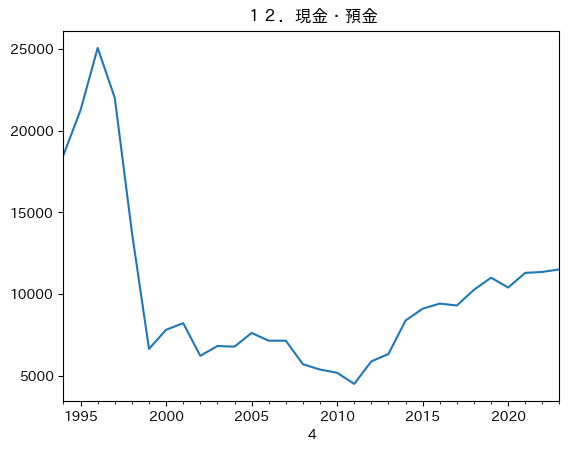

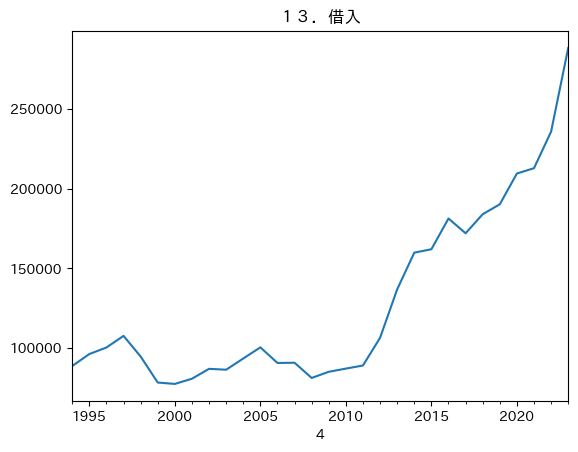

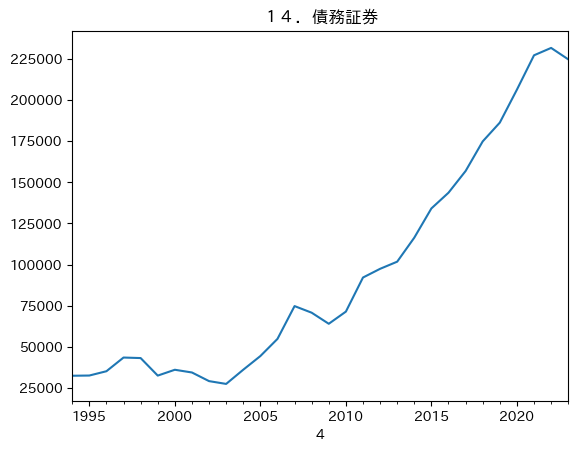

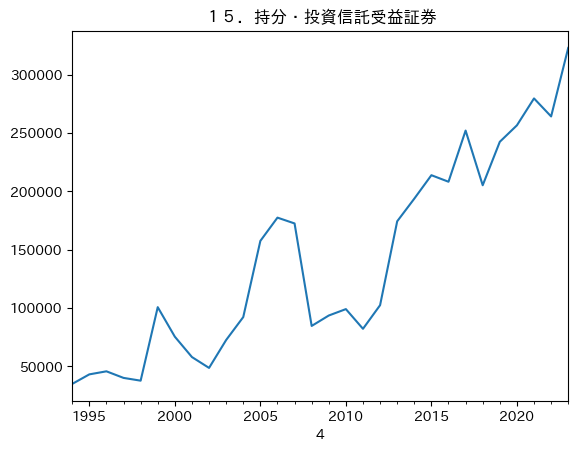

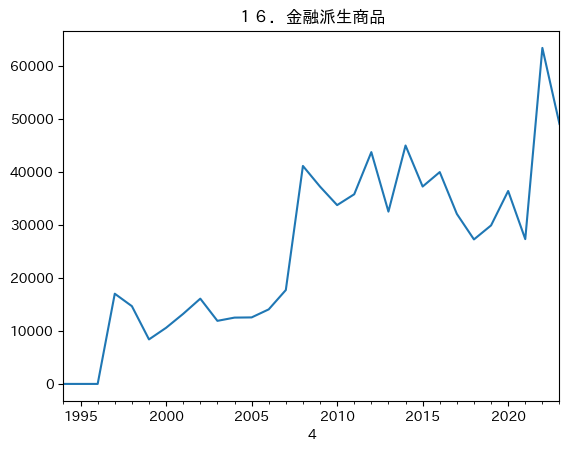

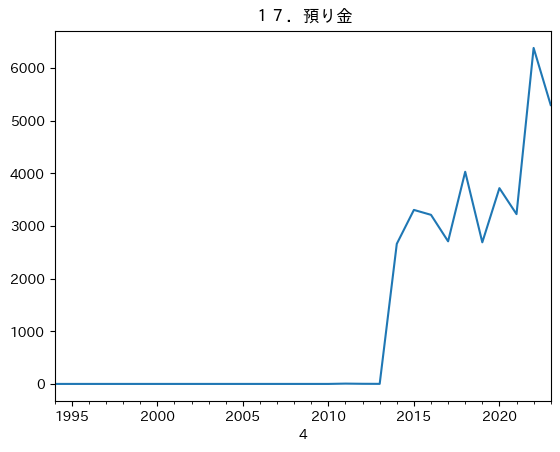

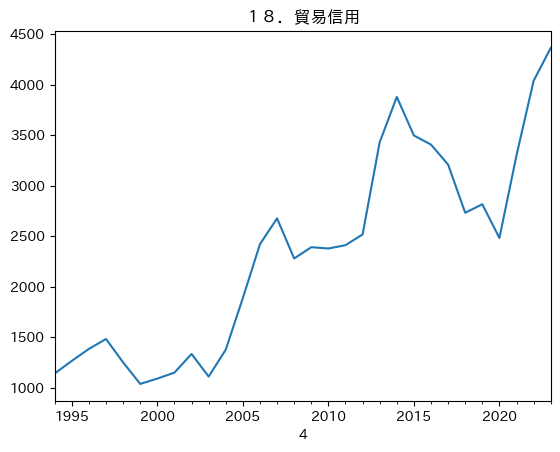

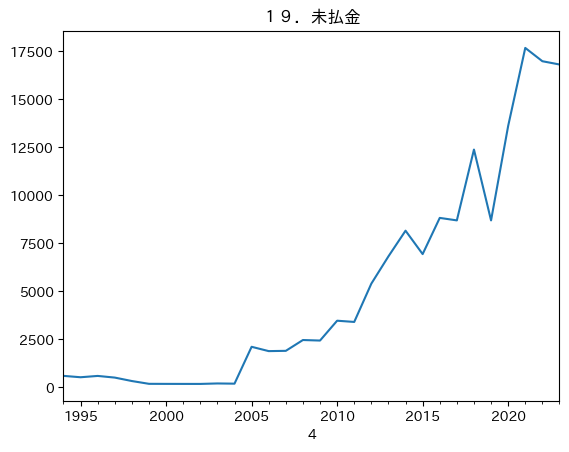

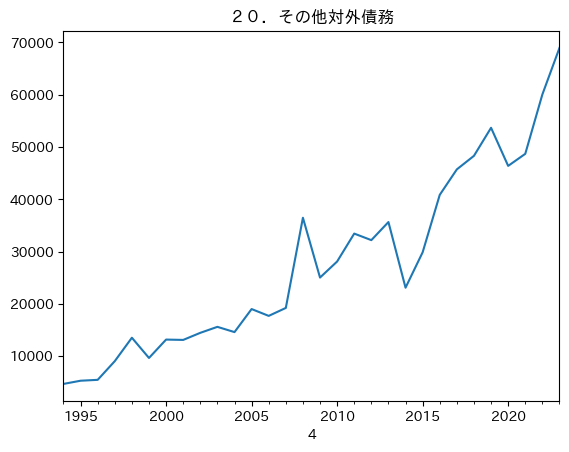

In [92]:
for column in debt_df.columns:
    plt.figure()  # Create a new figure for each column
    debt_df[column].plot(title=column)
    plt.show()

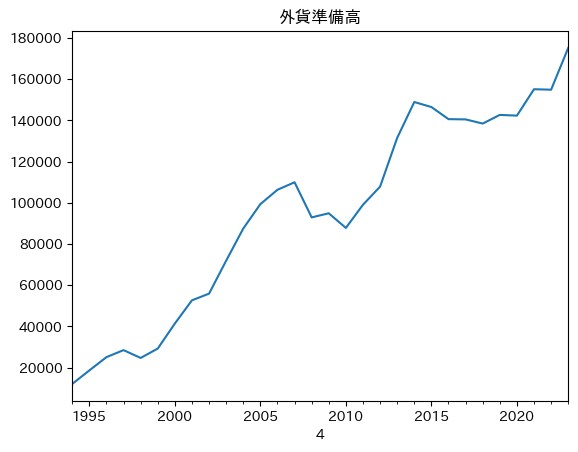

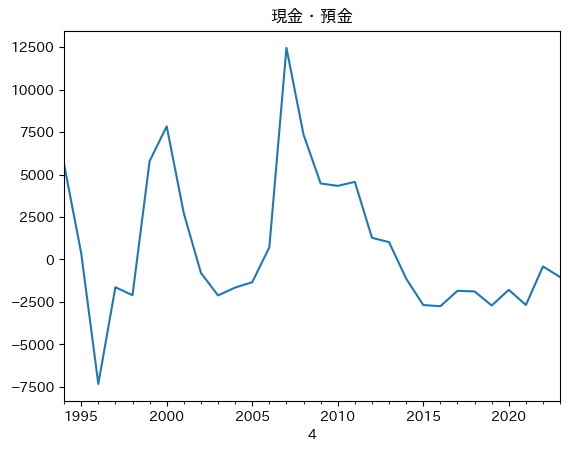

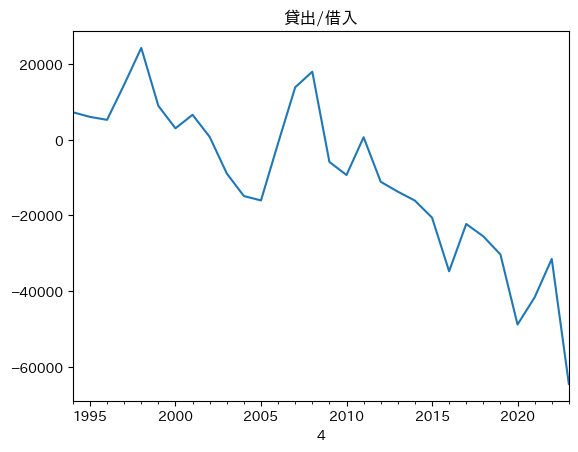

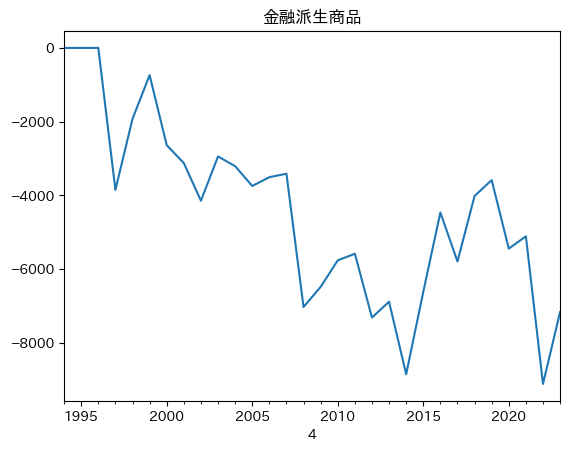

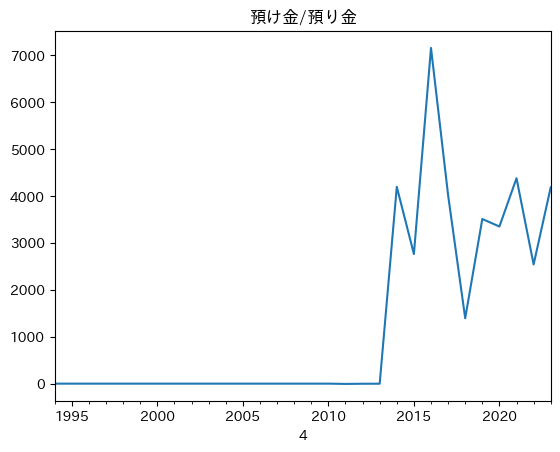

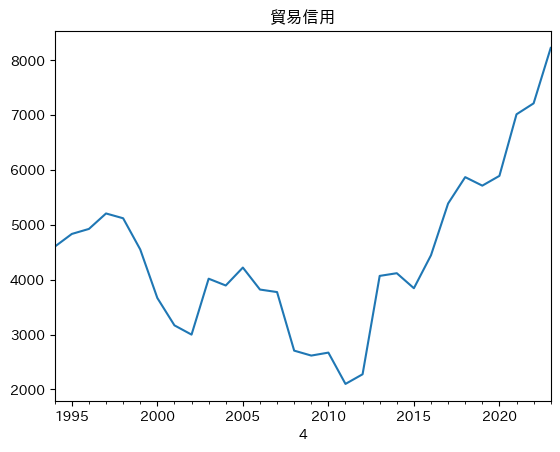

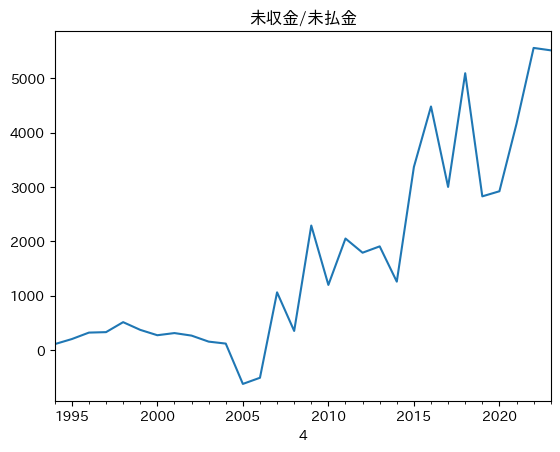

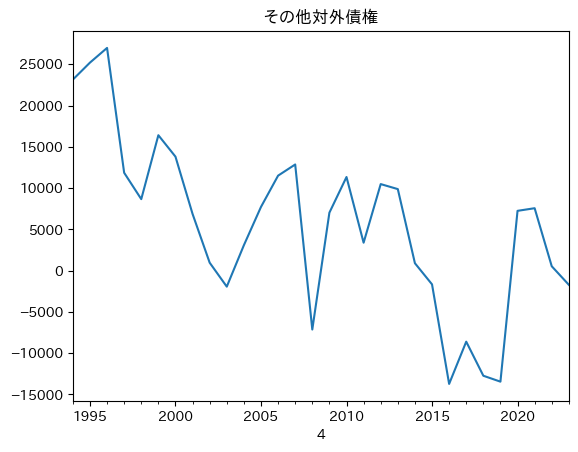

In [93]:
for column in equity_df.columns:
    plt.figure()  # Create a new figure for each column
    equity_df[column].plot(title=column)
    plt.show()